# Split the data into train and test data sets

The test data set should have enough data to allow for a good check of the models performance.

With a million examples in the data I am tempted to use a 90/10 train/test split, leaving 100k jobs to test the models performance on. Some basic checks of the test data will be made to ensure it will be suitable for validating the models performance.

One particular point of concern will be the `major` column:

- Because jobs with a label of `NONE` far outnumber any one of the other values that `major` can take on, this could cause issues when splitting with smaller test sizes.
- There may not be enough values in the test set for each value type in this variable to confidently test on; this will need some quick validation before moving on.

___

Try out 3 splits with different `test_sizes`:
- 85/15
- 90/10
- 95/5

visualize the distributions after and decide which split volume will be used for modeling.

In [1]:
from sklearn.model_selection import train_test_split
from src.data_split import test_split, visualize_split
import pandas as pd


random_state = 42  # Set random_state for the splitting

In [2]:
all_data = pd.read_csv("../data/interim/salaries_train_all.csv", index_col = 0)

# drop the companyId column as it won't be used in the model
all_data = all_data.drop(columns = "companyId")
all_data.head()

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Distributions before the split

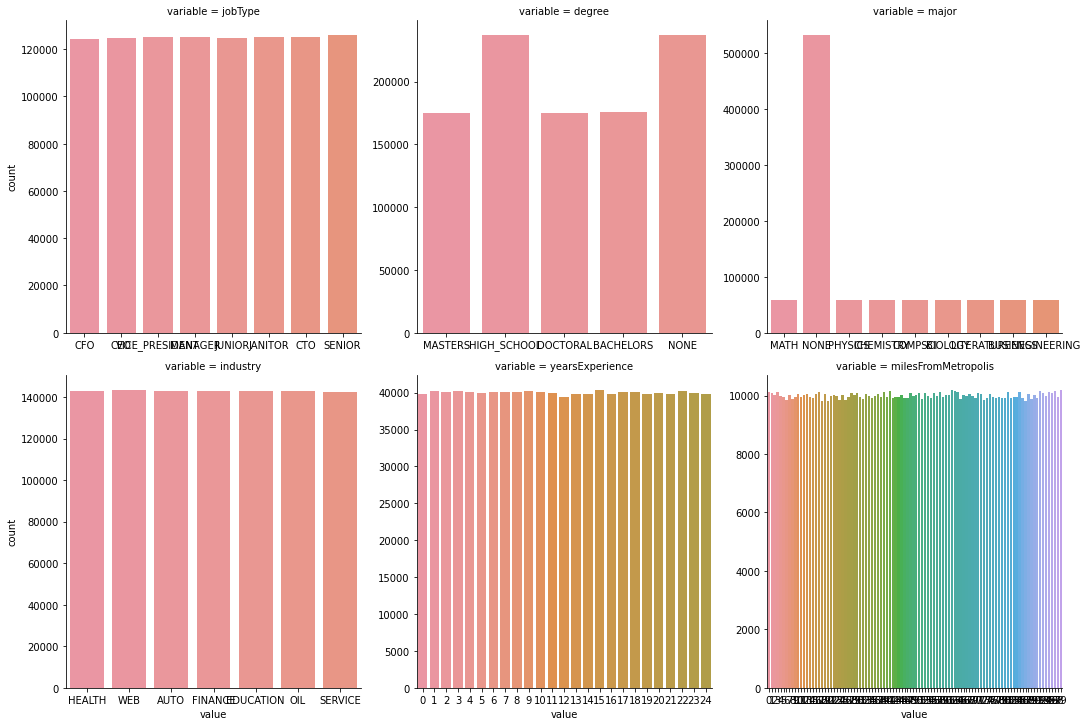

In [3]:
visualize_split(all_data)

# 85/15 Split

------------------------------
TRAIN DATA shape: (850000, 7)
TRAIN DATA distributions


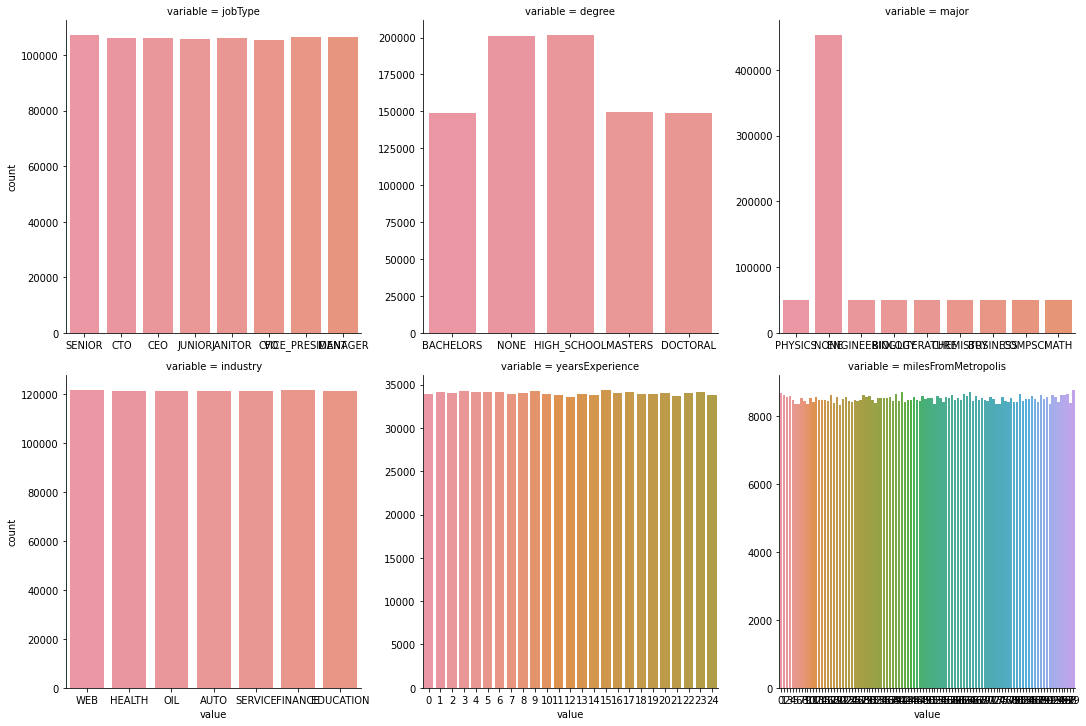

TRAIN DATA: Value counts for 'major' column:
NONE           452470
CHEMISTRY       50025
LITERATURE      49803
COMPSCI         49740
ENGINEERING     49703
PHYSICS         49682
BIOLOGY         49682
BUSINESS        49610
MATH            49285
Name: major, dtype: int64
------------------------------
TEST DATA shape: (150000, 7)
TEST DATA distributions


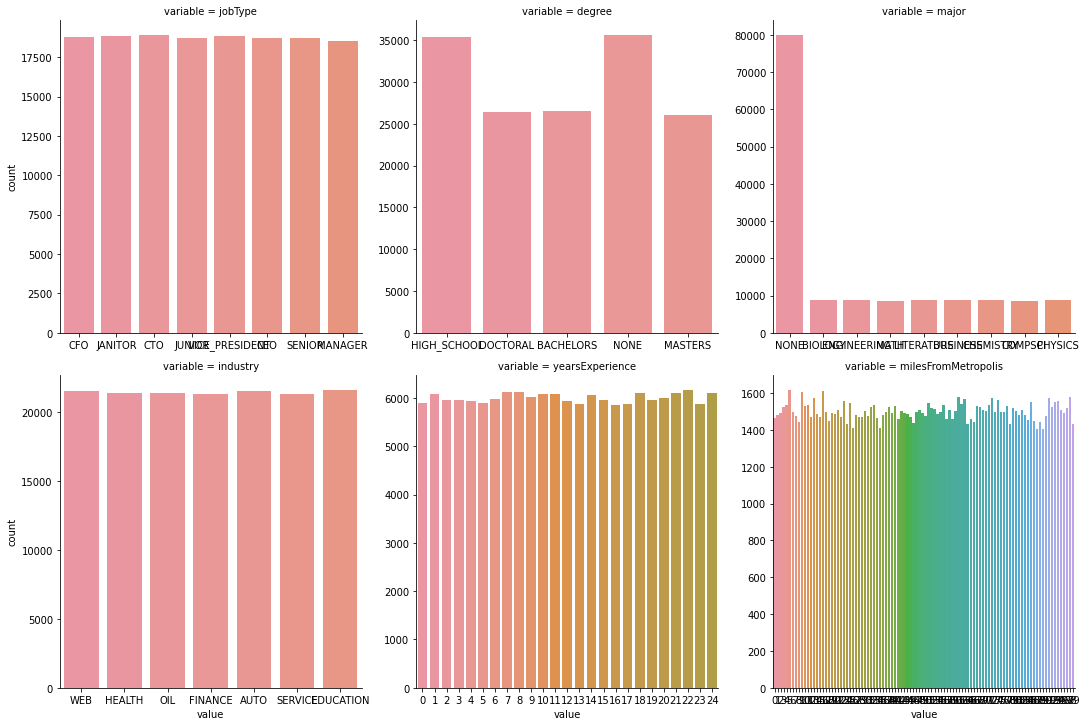

TEST DATA: Value counts for 'major' column:
NONE           79885
BUSINESS        8908
ENGINEERING     8893
LITERATURE      8881
CHEMISTRY       8850
PHYSICS         8728
BIOLOGY         8697
COMPSCI         8642
MATH            8516
Name: major, dtype: int64


In [4]:
test_split(all_data, test_size = 0.15, random_state = random_state)

# 90/10 Split

------------------------------
TRAIN DATA shape: (900000, 7)
TRAIN DATA distributions


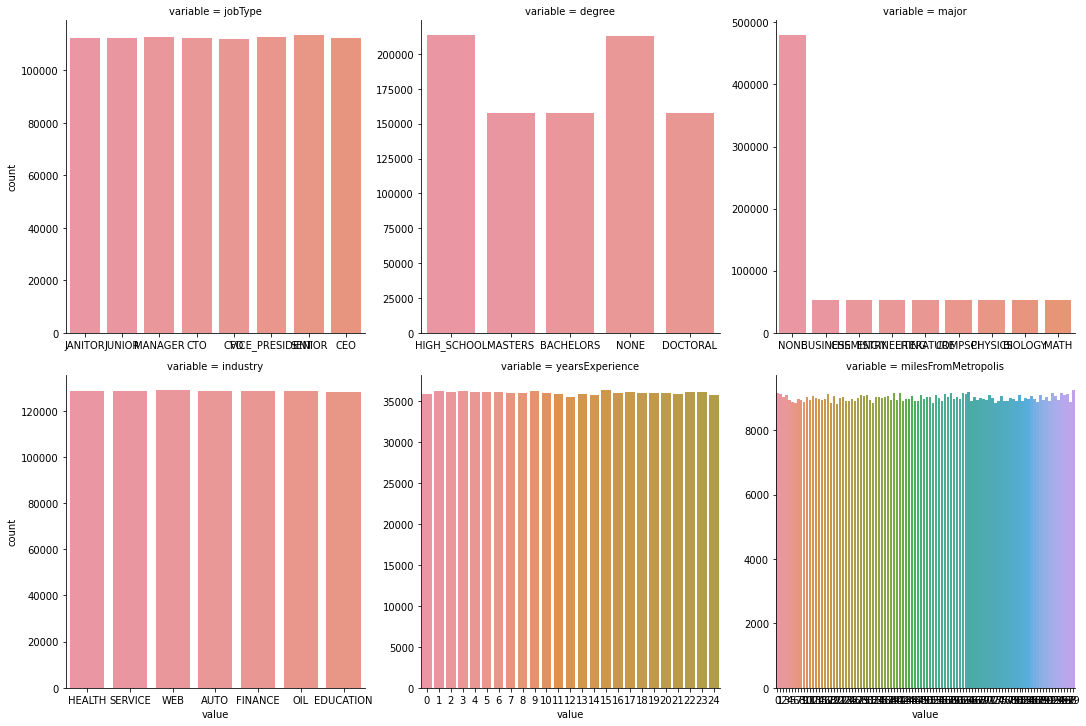

TRAIN DATA: Value counts for 'major' column:
NONE           479243
CHEMISTRY       52988
LITERATURE      52832
ENGINEERING     52685
BUSINESS        52556
PHYSICS         52554
COMPSCI         52543
BIOLOGY         52502
MATH            52097
Name: major, dtype: int64
------------------------------
TEST DATA shape: (100000, 7)
TEST DATA distributions


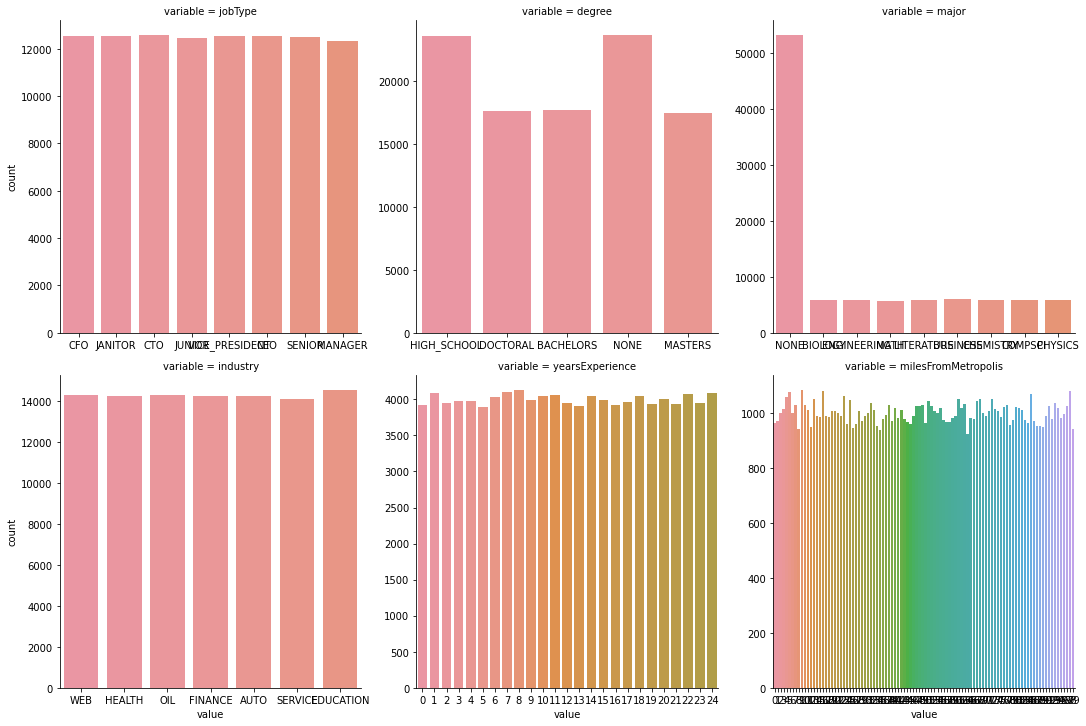

TEST DATA: Value counts for 'major' column:
NONE           53112
BUSINESS        5962
ENGINEERING     5911
CHEMISTRY       5887
BIOLOGY         5877
PHYSICS         5856
LITERATURE      5852
COMPSCI         5839
MATH            5704
Name: major, dtype: int64


In [5]:
test_split(all_data, test_size = 0.10, random_state = random_state)

# 95/5 Split

------------------------------
TRAIN DATA shape: (950000, 7)
TRAIN DATA distributions


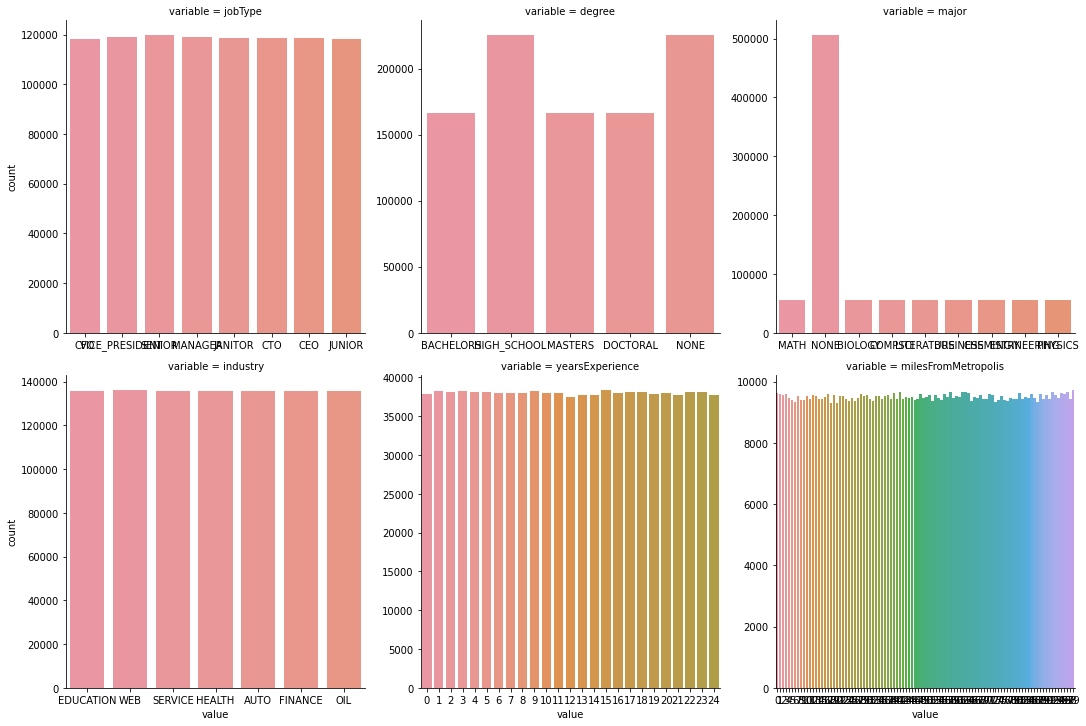

TRAIN DATA: Value counts for 'major' column:
NONE           505797
CHEMISTRY       55924
LITERATURE      55716
ENGINEERING     55628
BUSINESS        55511
BIOLOGY         55507
COMPSCI         55482
PHYSICS         55460
MATH            54975
Name: major, dtype: int64
------------------------------
TEST DATA shape: (50000, 7)
TEST DATA distributions


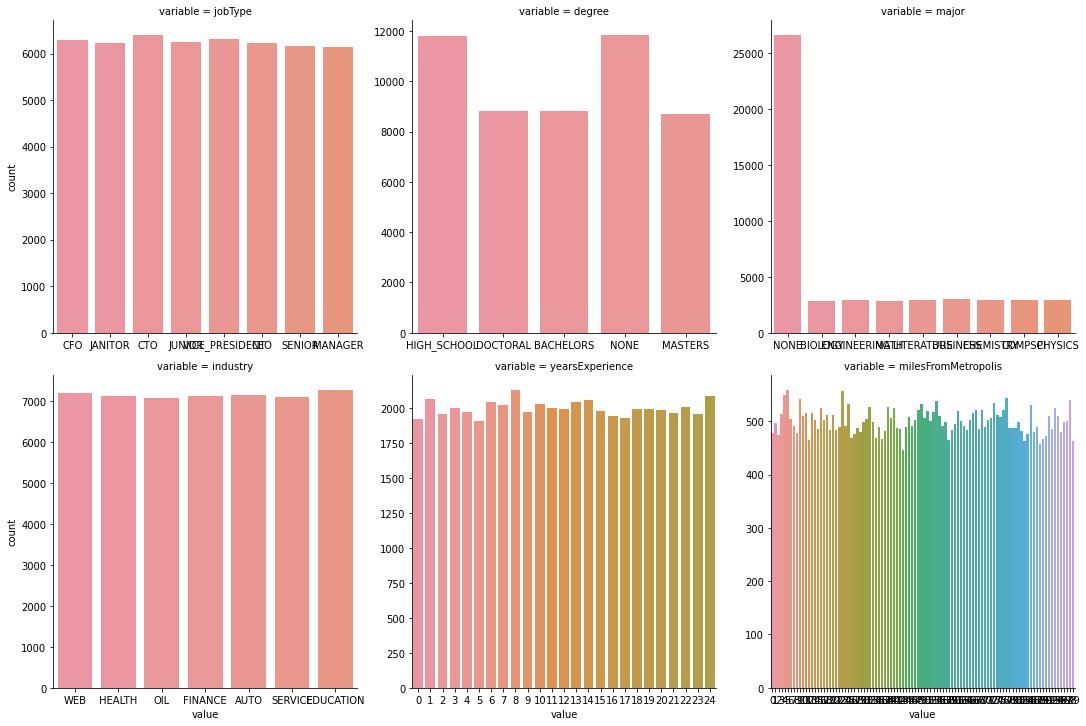

TEST DATA: Value counts for 'major' column:
NONE           26558
BUSINESS        3007
ENGINEERING     2968
LITERATURE      2968
CHEMISTRY       2951
PHYSICS         2950
COMPSCI         2900
BIOLOGY         2872
MATH            2826
Name: major, dtype: int64


In [6]:
test_split(all_data, test_size = 0.05, random_state = random_state)

# Conclusion and saving data sets

**85/15** training/test split looks to be the most reasonable.

___

Having a 5% test size leaves ~3k examples of each `major`. When thinking about the different dimensions of the data and dividing those examples up into different `jobTypes` and other variables, I don't think this is a reasonable amount of data to test on.
- in a similar way, I don't think the 90/10 split I was originally thinking would be optimal either. ~6k examples of each `major` is also a bit low to be confident in the models results. 

Going with 15% test set size here still allows for 850k samples for training/cross-validation and almost 9k examples in the test set for each `major` type. This should be sufficient for testing purposes.


In [7]:
data_train, data_test = train_test_split(all_data, test_size = 0.15, random_state = random_state)

In [8]:
data_train.to_csv("../data/interim/salaries_train_85_15_split.csv")
data_test.to_csv("../data/interim/salaries_test_85_15_split.csv")